<a href="https://colab.research.google.com/github/ErmaS1294/project/blob/main/dataminingpraktek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Load Datasets**

In [70]:
#Load Data From Local File
data = pd.read_excel("Dataset Telco.xlsx")

**Data Understanding**

In [72]:
#See the first 5 data
data.head()

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,2424-WVHPL,France,Male,1,No,No,1,Yes,No,Fiber optic,...,No,No,Yes,No,No,No,Electronic check,12.00,12.00,No
1,3679-XASPY,France,Female,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,13.00,13.00,No
2,2967-MXRAV,Germany,Male,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Mailed check,18.80,18.80,No
3,8992-CEUEN,Germany,Female,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,18.85,18.85,No
4,9318-NKNFC,Germany,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,Mailed check,18.85,18.85,Yes


In [73]:
#see the number of rows and number of columns of data
data.shape

(7043, 21)

In [74]:
#Understanding each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   region            7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [75]:
#See a statistical summary of variables with numeric types
data.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.401107,64.751874,2294.275919
std,0.368612,24.606849,30.097858,2316.761157
min,0.000000,1.000000,12.000000,12.000000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3801.400000
max,1.000000,120.000000,118.750000,22345.600000


# **Data Cleaning and Preprocessing**

**Check Duplicate Data**

In [76]:
#Drop duplicate value
data = data.drop_duplicates()

In [77]:
#see changes in the number of rows and columns after the duplicate value is deleted
data.shape

(7043, 21)

**Check Data Types**

In [78]:
#check data types
data.dtypes

,0
customerid,object
region,object
gender,object
seniorcitizen,int64
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object


In [79]:
#merubah nilai kosong dengan isi spasi menjadi NA
data["totalcharges"] = data["totalcharges"].replace(" ",np.nan)

In [80]:
#merubah tipe data
data["totalcharges"] = data["totalcharges"].astype("float64")

In [81]:
data.dtypes

,0
customerid,object
region,object
gender,object
seniorcitizen,int64
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object


**Check Missing Value**

In [82]:
#check the missing value
data.isnull().sum()

,0
customerid,0
region,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0


**Impute Missing Value**

<ipython-input-83-f948605a1070>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["totalcharges"])


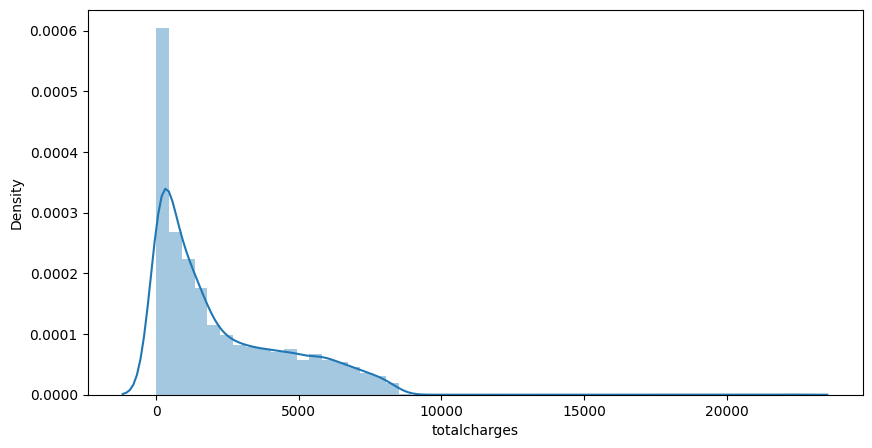

In [83]:
#Look at the distribution of the totalcharges variable with histogram and densityplot
plt.figure(figsize=(10,5))
sns.distplot(data["totalcharges"])
plt.show()

In [84]:
#Because the totalcharges variable has positive skewed, therefore the missing value is imputed with the median
fill=data["totalcharges"].median()
data["totalcharges"]=data["totalcharges"].fillna(fill)

In [86]:
#check missing value after imputation
data.isnull().sum()

,0
customerid,0
region,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0


**Outlier Detection**

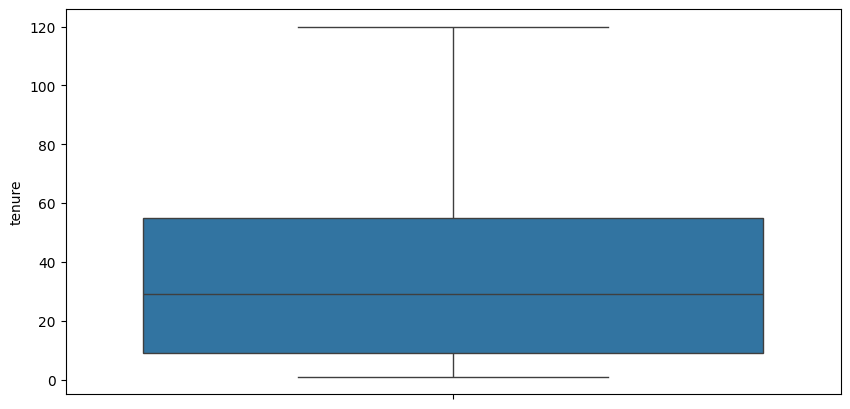

In [87]:
#Check Outlier on the Tenure variable
plt.figure(figsize=(10,5))
sns.boxplot(data["tenure"])
plt.show()

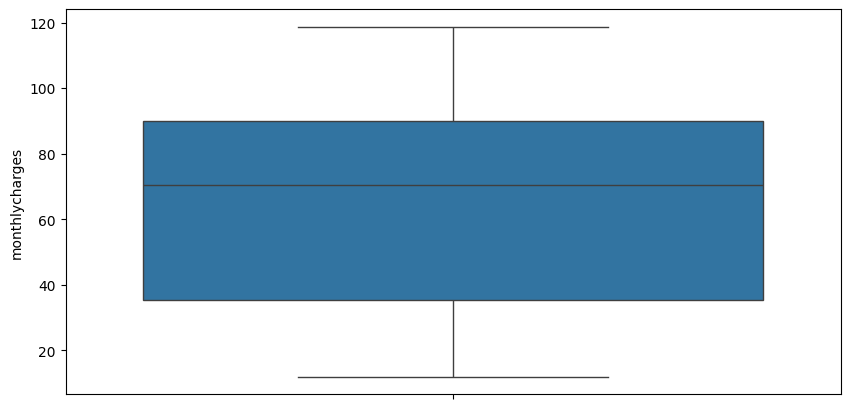

In [88]:
#check Outlier on the monthlycharges variable
plt.figure(figsize=(10,5))
sns.boxplot(data["monthlycharges"])
plt.show()

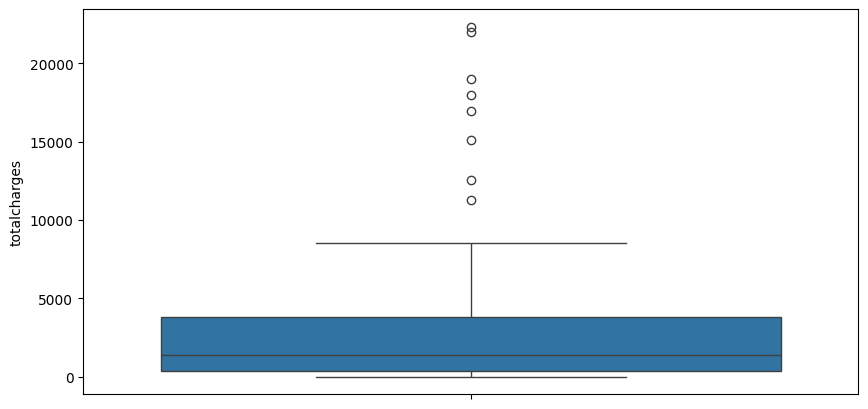

In [89]:
#Check Outlier on the totalcharges variable
plt.figure(figsize=(10,5))
sns.boxplot(data["totalcharges"])
plt.show()

In [90]:
#See observation outliers on the totalcharges variable
Q1=data["totalcharges"].quantile(0.25)
Q3=data["totalcharges"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 - (1.5*IQR)
upper_range = Q3 + (1.5*IQR)
data.loc[(data["totalcharges"]>upper_range),:]

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
7024,2889-FPWRM,Germany,Male,0,Yes,No,96,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Bank transfer (automatic),117.80,11308.8,Yes
7025,7892-POOKP,France,Female,0,Yes,No,120,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Yes,Yes,Electronic check,104.80,12576.0,Yes
7026,7569-NMZYQ,Germany,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Bank transfer (automatic),118.75,15087.9,No
7027,9739-JLPQJ,Germany,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,No,Credit card (automatic),117.50,16987.9,No
7028,9924-JPRMC,Germany,Male,0,No,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Electronic check,118.20,17987.3,No
7029,8879-XUAHX,Germany,Male,0,Yes,No,71,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Electronic check,116.25,18987.9,No
7030,9788-HNGUT,Germany,Male,0,Yes,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Credit card (automatic),116.95,21987.5,No
7031,6007-TCTST,Germany,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Bank transfer (automatic),115.80,22345.6,No


In [91]:
#Replace outlier observations with upper bound and lower bound
data.loc[(data["totalcharges"]>upper_range),"totalcharges"]=upper_range

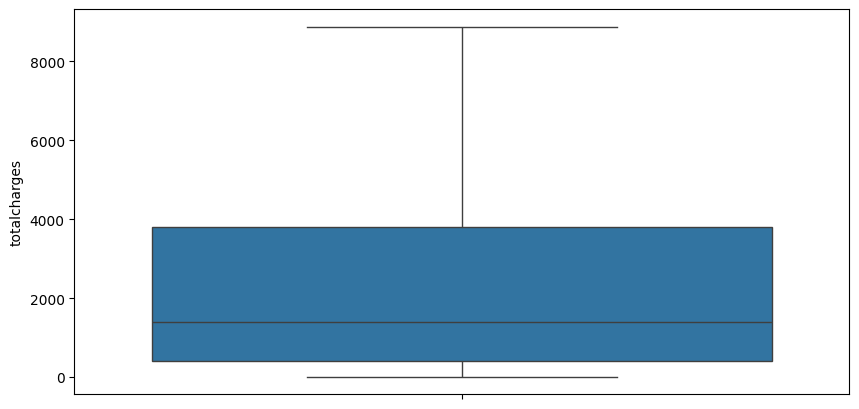

In [92]:
#Check Outlier on teh totalcharges variable
plt.figure(figsize=(10,5))
sns.boxplot(data["totalcharges"])
plt.show()

**Handle Inconsistent Data**

In [93]:
#Replace "No Internet Service" with "No"
replace_cols1 = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']
for i in replace_cols1:
    data[i] = data[i].replace({'No internet service' : 'No'})

#Replace "No Phone Service" with "No"
data['multiplelines'] = data['multiplelines'].replace({'No phone service' : 'No'})

**Encoding Variables**

In [94]:
from sklearn.preprocessing import LabelEncoder

#Separating categorial and numerical columns
Id_cols = ['customerid']
num_cols = ['tenure', 'monthlycharges', 'totalcharges']

#Biner category columns
bin_cols = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'onlinesecurity', 'churn', 'onlinebackup',
           'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling']

#Multi category columns
multi_cols = ['region', 'internetservice', 'paymentmethod']

#Label encoding Biner category columns
le = LabelEncoder()
for i in bin_cols:
    data[i] = le.fit_transform(data[i])

#Label encoding for nominal multi category columns
data=pd.get_dummies(data = data,columns = multi_cols , drop_first = True)

In [95]:
data

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,...,monthlycharges,totalcharges,churn,region_France,region_Germany,internetservice_Fiber optic,internetservice_No,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,2424-WVHPL,1,1,0,0,1,1,0,0,0,...,12.00,12.000,0,True,False,True,False,False,True,False
1,3679-XASPY,0,0,1,1,1,1,0,0,0,...,13.00,13.000,0,True,False,False,True,False,True,False
2,2967-MXRAV,1,0,1,1,1,1,0,0,0,...,18.80,18.800,0,False,True,False,True,False,False,True
3,8992-CEUEN,0,0,0,0,1,1,0,0,0,...,18.85,18.850,0,False,True,False,True,False,True,False
4,9318-NKNFC,1,0,0,0,1,1,0,0,0,...,18.85,18.850,1,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4472-LVYGI,0,0,1,1,2,0,0,1,0,...,52.55,1397.475,0,False,True,False,False,False,False,False
7039,1371-DWPAZ,0,0,1,1,2,0,0,1,1,...,56.05,1397.475,0,False,True,False,False,True,False,False
7040,2775-SEFEE,1,0,0,1,3,1,1,1,1,...,61.90,1397.475,0,False,True,False,False,False,False,False
7041,4075-WKNIU,0,0,1,1,3,1,1,0,1,...,73.35,1397.475,0,False,True,False,False,False,False,True


**Data Partition**

In [96]:
data = data.drop(labels='customerid', axis=1)

In [105]:
from sklearn.model_selection import train_test_split

#Partition data into data training and data testing
train,test = train_test_split(data, test_size=0.20, random_state=111)

#Separating dependent and independent variables on training and testing data
train_X = train.drop(labels='churn', axis=1)
train_Y = train['churn']
test_X = test.drop(labels='churn', axis=1)
test_Y = test['churn']

# **SMOTE (Synsthetic Minority Oversampling Technique)**

In [106]:
from imblearn.over_sampling import SMOTE

#Handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy= 'minority', random_state=123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(train_X,train_Y)
train_smote_X = pd.DataFrame(data=train_smote_X,columns=train_X.columns)
train_smote_Y = pd.DataFrame(data=train_smote_Y)

In [107]:
#Propotion
train_Y.value_counts()

,count
churn,
0,4136
1,1498


In [108]:
#Propotion after smote
train_smote_Y.value_counts()

,count
churn,
0,4136
1,4136


**Feature Scaling Khusus SVM**

In [110]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_smote_X_2 = train_smote_X
test_X_2 = test_X
train_smote_X_2[num_cols] = sc.fit_transform(train_smote_X[num_cols])
test_X_2[num_cols] = sc.transform(test_X_2[num_cols])

**Modeling**

**Support Vector Machine**

In [113]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm=SVC()
param_grid = {
    "C": [0.1, 1],
    "gamma" : [0.1, 1],
    "kernel" : ["Linier", "rbf"]
}

In [114]:
from sklearn.model_selection import GridSearchCV
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=2)
CV_svm.fit(train_smote_X_2, train_smote_Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [0.1, 1],
                         'kernel': ['Linier', 'rbf']})

In [115]:
CV_svm.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

**Evaluation**

In [116]:
pred=CV_svm.predict(test_X_2)

In [117]:
from sklearn.metrics import accuracy_score
print("Accuracy for Logreg on test data: ", accuracy_score(test_Y,pred))

Accuracy for Logreg on test data:  0.7615330021291696


In [119]:
from sklearn.metrics import confusion_matrix
CF=confusion_matrix(test_Y,pred)
CF

array([[826, 212],
       [124, 247]])

In [120]:
from sklearn.metrics import classification_report
target_names = ['No', 'Yes']
print(classification_report(test_Y, pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.87      0.80      0.83      1038
         Yes       0.54      0.67      0.60       371

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.76      0.77      1409



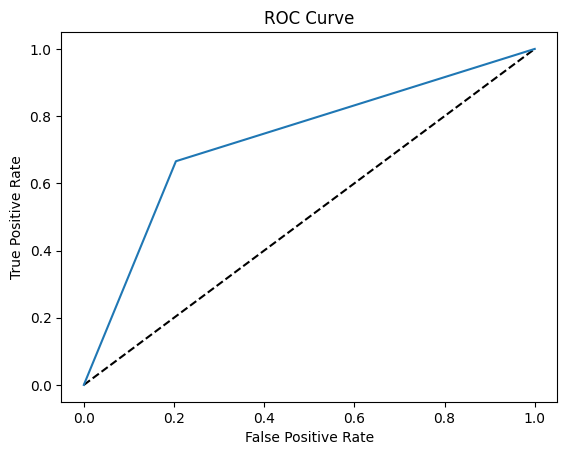

In [121]:
from sklearn.metrics import roc_curve

#Generate ROC curve value : fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_Y, pred)

#Plot ROC curve
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [122]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y, pred)

0.7307646365340771

**Random Forest**

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
param_grid = {
    'n_estimators': [200, 500, 1000],
    'max_features': ['auto', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['entropy', 'gini']
}

In [128]:
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2)
CV_rf.fit(train_smote_X, train_smote_Y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [200, 500, 1000]})

In [129]:
CV_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 1000}

**Evaluation**

In [130]:
pred=CV_rf.predict(test_X)

In [131]:
print("Accuracy for Random Forest on CV data: ", accuracy_score(test_Y,pred))

Accuracy for Random Forest on CV data:  0.7572746628814763


In [132]:
CF=confusion_matrix(test_Y,pred)
CF

array([[811, 227],
       [115, 256]])

In [133]:
from sklearn.metrics import classification_report
target_names = ['No', 'Yes']
print(classification_report(test_Y, pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.88      0.78      0.83      1038
         Yes       0.53      0.69      0.60       371

    accuracy                           0.76      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.78      0.76      0.77      1409



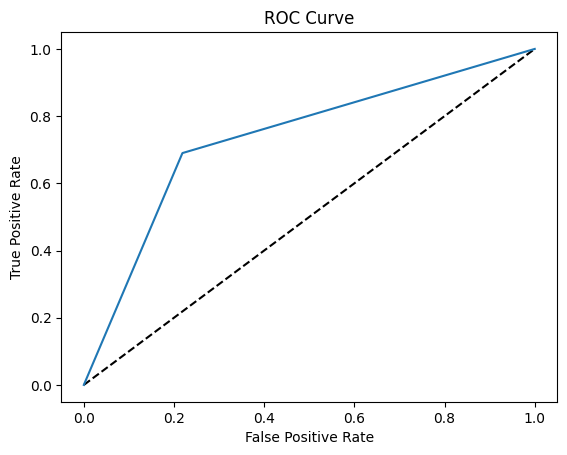

In [134]:
from sklearn.metrics import roc_curve

#Generate ROC curve value : fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_Y, pred)

#Plot ROC curve
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [135]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y, pred)

0.7356685830619738